In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import librosa


In [9]:
audio_path = "/home/kalyan/Downloads/bestringtones.net_anuel-aa-messiah-drippin.wav"

/home/kalyan/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


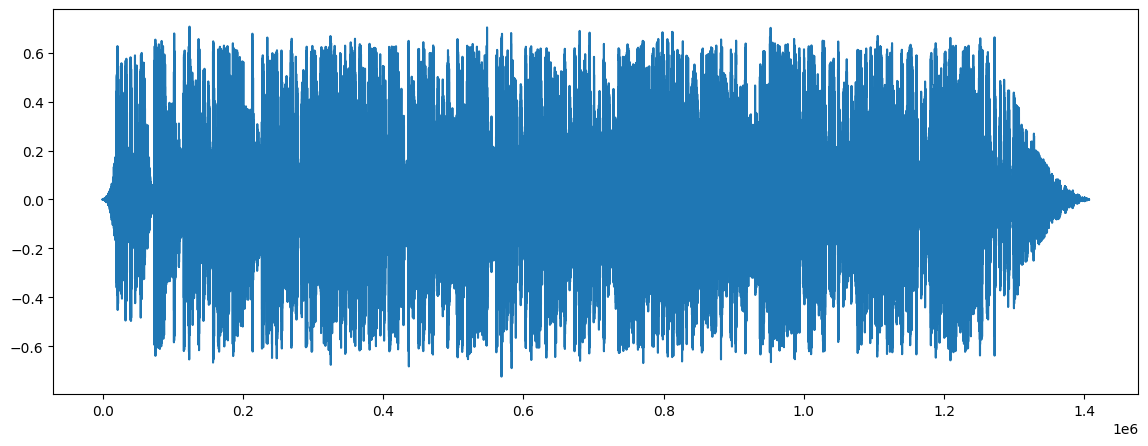

In [19]:
#adding noise to the audio using fft
def add_noise(audio_path):
    audio, sample_rate = librosa.load(audio_path, sr=None)
    fft = np.fft.fft(audio)
    fft_magnitude, fft_phase = np.abs(fft), np.angle(fft)
    fft_magnitude_with_noise = fft_magnitude + np.random.normal(0, 1, fft_magnitude.shape)
    fft_with_noise = fft_magnitude_with_noise * np.exp(1j * fft_phase)
    audio_with_noise = np.fft.ifft(fft_with_noise)
    return audio_with_noise
noise_audio = add_noise(audio_path)
#plottin
plt.figure(figsize=(14, 5))
plt.plot(noise_audio)
plt.show()

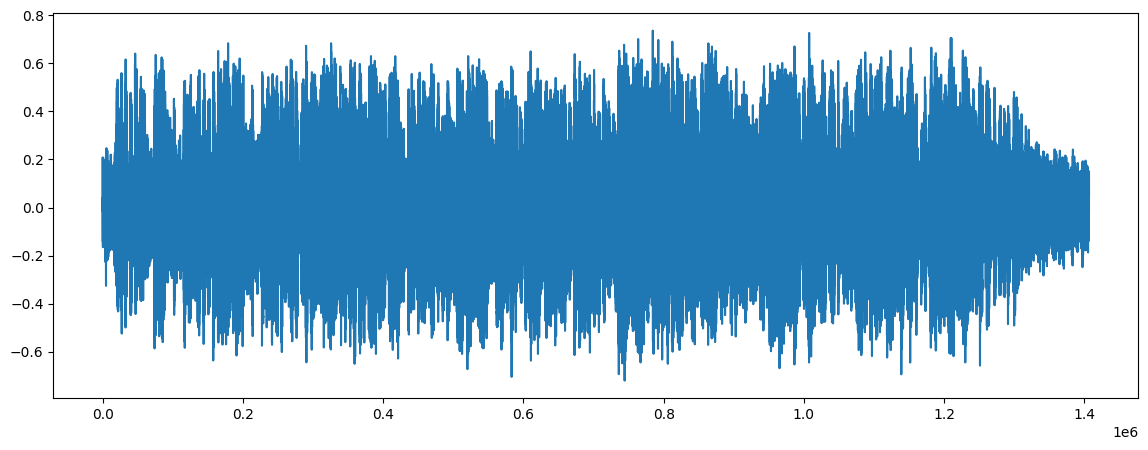

In [21]:
#denoising the audio using ifft
def denoise(audio_path):
    audio, sample_rate = librosa.load(audio_path, sr=None)
    fft = np.fft.fft(audio)
    fft_magnitude, fft_phase = np.abs(fft), np.angle(fft)
    fft_magnitude_with_noise = fft_magnitude + np.random.normal(0, 1, fft_magnitude.shape)
    fft_with_noise = fft_magnitude_with_noise * np.exp(1j * fft_phase)
    audio_with_noise = np.fft.ifft(fft_with_noise)
    fft = np.fft.fft(audio_with_noise)
    fft_magnitude, fft_phase = np.abs(fft), np.angle(fft)
    fft_magnitude_denoised = scipy.ndimage.median_filter(fft_magnitude, size=3)
    fft_denoised = fft_magnitude_denoised * np.exp(1j * fft_phase)
    audio_denoised = np.fft.ifft(fft_denoised)
    return audio_denoised
denoise_audio = denoise(audio_path)
#plotting
plt.figure(figsize=(14, 5))
plt.plot(denoise_audio)
plt.show()


In [23]:
#saving the noise audio
import soundfile as sf
#changing to float32
noise_audio = noise_audio.astype(np.float32)
sf.write('noise_audio.wav', noise_audio, 44100)


/tmp/ipykernel_98297/1409179014.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  noise_audio = noise_audio.astype(np.float32)


In [24]:
#saving the denoised audio
denoise_audio = denoise_audio.astype(np.float32)
sf.write('denoise_audio.wav', denoise_audio, 44100)

/tmp/ipykernel_98297/419107626.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  denoise_audio = denoise_audio.astype(np.float32)
